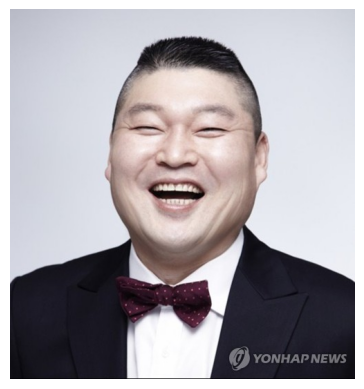

In [15]:
import cv2
import matplotlib.pyplot as plt

# 이미지 파일 경로 설정
image_path = 'face.jpg'

# 이미지 불러오기
image = cv2.imread(image_path)

# 이미지를 RGB로 변환하여 플롯으로 표시
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


In [18]:
import cv2
import math

def estimate_age(image_path):
    # 이미지 불러오기
    image = cv2.imread(image_path)
    
    # Haar Cascade 분류기를 사용하여 얼굴 검출
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    # 검출된 얼굴 영역에서 딥러닝 모델을 활용하여 나이 추정
    age_net = cv2.dnn.readNetFromCaffe('deploy_age.prototxt', 'age_net.caffemodel')
    
    for (x, y, w, h) in faces:
        face_img = image[y:y+h, x:x+w].copy()
        
        # 딥러닝 모델 입력 형식에 맞게 변환
        blob = cv2.dnn.blobFromImage(face_img, scalefactor=1.0, size=(227, 227), mean=(78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
        
        # 딥러닝 모델 입력 및 예측
        age_net.setInput(blob)
        age_preds = age_net.forward()
        
        # 예측된 나이 추출
        age = age_preds[0][0] * 100
        
        # 소수점 첫째 자리 반올림
        age = round(age)
        
        return age
    
    # 얼굴이 검출되지 않을 경우 예외 처리
    raise Exception("No face detected in the image.")

# 이미지 파일 경로 설정
image_path = 'face.jpg'

# 나이 예측 실행
try:
    age = estimate_age(image_path)
    print("Estimated age:", age)
except Exception as e:
    print(str(e))


Estimated age: 0


Estimated age: 0


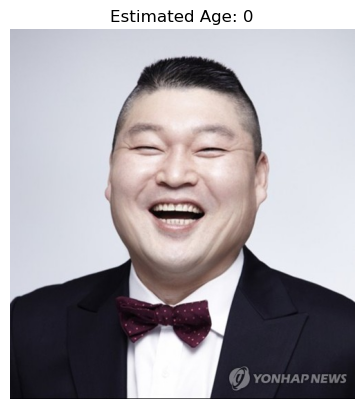

In [17]:
import cv2
import dlib

def estimate_age(image_path):
    # 이미지 불러오기
    image = cv2.imread(image_path)
    
    # dlib의 얼굴 인식기 로드
    detector = dlib.get_frontal_face_detector()
    
    # 이미지를 그레이스케일로 변환
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 얼굴 인식
    faces = detector(gray)
    
    # 인식된 얼굴이 없을 경우 예외 처리
    if len(faces) == 0:
        raise Exception("No face detected in the image.")
    
    # 가장 큰 얼굴 선택
    face = max(faces, key=lambda rect: rect.width() * rect.height())
    
    # 얼굴 영역에서 딥러닝 모델을 활용하여 나이 추정
    age_net = cv2.dnn.readNetFromCaffe('deploy_age.prototxt', 'age_net.caffemodel')
    
    # 얼굴 영역 추출
    (x, y, w, h) = (face.left(), face.top(), face.width(), face.height())
    face_img = image[y:y+h, x:x+w].copy()
    
    # 딥러닝 모델 입력 형식에 맞게 변환
    blob = cv2.dnn.blobFromImage(face_img, scalefactor=1.0, size=(227, 227), mean=(78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
    
    # 딥러닝 모델 입력 및 예측
    age_net.setInput(blob)
    age_preds = age_net.forward()
    
    # 예측된 나이 추출
    age = age_preds[0][0] * 100
    
    # 소수점 첫째 자리 반올림
    age = round(age)
    
    return age


# 이미지 파일 경로 설정
image_path = 'face.jpg'

# 나이 예측 실행
try:
    age = estimate_age(image_path)
    print("Estimated age:", age)
    
    # 이미지를 Jupyter Notebook에서 표시
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title("Estimated Age: {}".format(age))
    plt.show()
    
except Exception as e:
    print(str(e))
